In [2]:
import pandas as pd
import seaborn as sns

# Demographics Analysis

In [3]:
grey = (187/255, 187/255, 187/255)
darkgreen = (51/255, 117/255, 56/255)
teal = (93/255, 168/255, 153/255)
blue = (148/255, 203/255, 236/255)
yellow = (220/255, 205/255, 125/255)

color_pallete = sns.color_palette([grey, darkgreen, teal, blue, yellow])

In [4]:
demographics_df = pd.read_csv('data/pre_study_survey.csv')
demographics_df.columns = ['start_date', 'end_date', 'status', 'progress', 'duration', 'finished', 'recorded_date', 'response_id', 'dist_channel', 'user_lang', 
                           'participant_id', 'q2_gender', 'q2_gender_desc', 'q3_age', 'q4_ethnicity', 'q5_student_status', 'q5_student_status_other', 
                           'q6_undergrad_loc', 'q6_undergrad_loc_desc', 'q7_programming_exp', 'q8_programming_langs', 'q8_programming_lang_other', 
                           'q9_grading_experience', 'q10_grading_time', 'q11_grading_freq']
demographics_df.drop(columns=['start_date', 'end_date', 'status', 'progress', 'duration', 'finished', 'recorded_date', 'response_id', 'dist_channel', 'user_lang'], inplace=True)
demographics_df = demographics_df.iloc[2:]
demographics_df

,participant_id,q2_gender,q2_gender_desc,q3_age,q4_ethnicity,q5_student_status,q5_student_status_other,q6_undergrad_loc,q6_undergrad_loc_desc,q7_programming_exp,q8_programming_langs,q8_programming_lang_other,q9_grading_experience,q10_grading_time,q11_grading_freq
2,4,Male,NaN,27,Other (Arab or any others),PhD Student,NaN,UK Institution,NaN,5+ years,"Java,C++,Python,Others",NaN,No,NaN,NaN
3,10,Male,NaN,25,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",PhD Student,NaN,US/Canada Institution,NaN,5+ years,"Java,C,Python,Others",Kotlin,Yes,2 - 3 years,3 - 5 per academic year
4,18,Male,NaN,23,White,Master's Student,NaN,UK Institution,NaN,5+ years,"Java,Python",NaN,Yes,2 - 3 years,5+ per academic year
5,19,Male,NaN,24,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",Master's Student,NaN,Asian Institution,NaN,5+ years,"Java,Python,Others","TypeScript, JavaScript",Yes,0 - 1 years,1 - 2 per academic year
6,3,Male,NaN,23,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",Master's Student,NaN,Asian Institution,NaN,5+ years,"Java,C++,C,Python",NaN,Yes,1 - 2 years,3 - 5 per academic year
7,16,Male,NaN,21,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",3rd Year Student,NaN,UK Institution,NaN,5+ years,"Java,C++,Python",NaN,No,NaN,NaN
8,24,Male,NaN,24,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",Master's Student,NaN,European Institution,NaN,5+ years,"Java,C++,Python",NaN,No,NaN,NaN
9,2,Male,NaN,22,Black/African/Caribbean,Master's Student,NaN,UK Institution,NaN,5+ years,"Java,Python",NaN,No,NaN,NaN
10,25,Male,NaN,24,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",PhD Student,NaN,UK Institution,NaN,5+ years,"Java,C,Python",NaN,No,NaN,NaN
11,5,Male,NaN,21,White,3rd Year Student,NaN,UK Institution,NaN,5+ years,"Java,Python,Others","Kotlin, Swift, Scala",No,NaN,NaN


### Gender

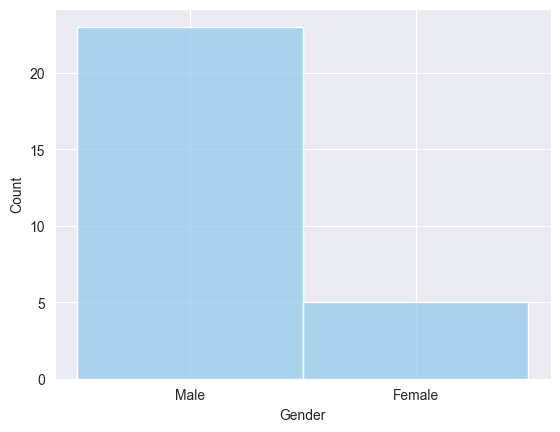

In [5]:
gender_plot = sns.histplot(demographics_df, x='q2_gender', color=blue)
gender_plot.set(xlabel='Gender')
gender_plot.get_figure().savefig('plots/gender.pdf', bbox_inches='tight')

### Age

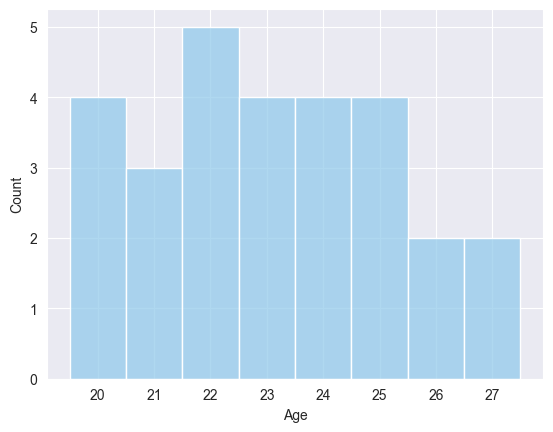

In [6]:
age_plt = sns.histplot(demographics_df.sort_values(['q3_age']), x='q3_age', color=blue)
age_plt.set(xlabel='Age')
age_plt.get_figure().savefig('plots/age.pdf', bbox_inches='tight')

### Ethnicity

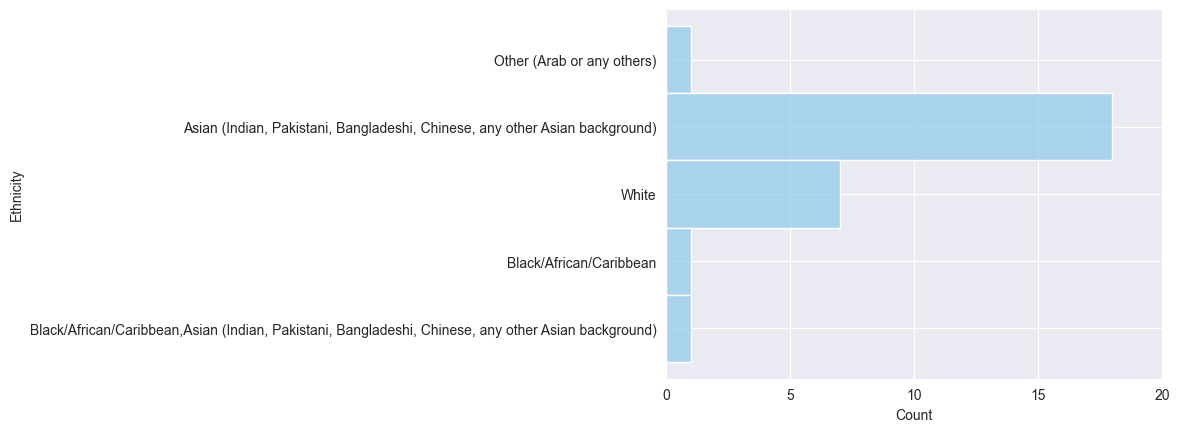

In [7]:
ethnicity_plot = sns.histplot(demographics_df, y='q4_ethnicity', color=blue)
ethnicity_plot.set(ylabel='Ethnicity')
ethnicity_plot.locator_params(axis='x', integer=True)
ethnicity_plot.set_xlim(0, 20)

ethnicity_plot.get_figure().savefig('plots/ethnicity.pdf', bbox_inches='tight')

### Student Status

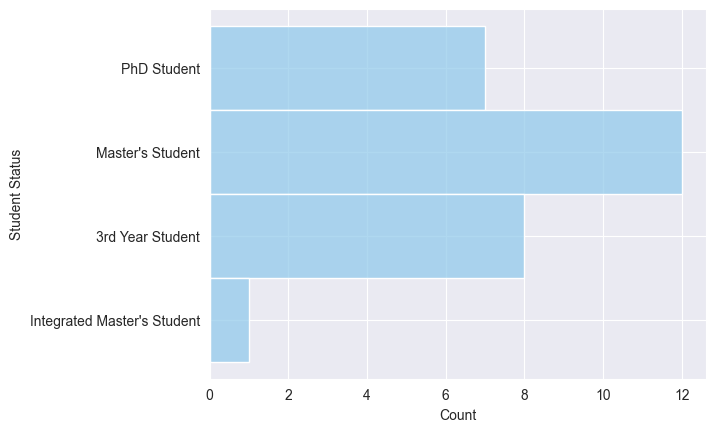

In [8]:
demographics_df['q5_student_status'] = demographics_df['q5_student_status'].replace('Other', "Integrated Master's Student")

student_status_plt = sns.histplot(demographics_df, y='q5_student_status', color=blue)
student_status_plt.set(ylabel='Student Status')

student_status_plt.get_figure().savefig('plots/student_status.pdf', bbox_inches='tight')

### Undergraduate Location

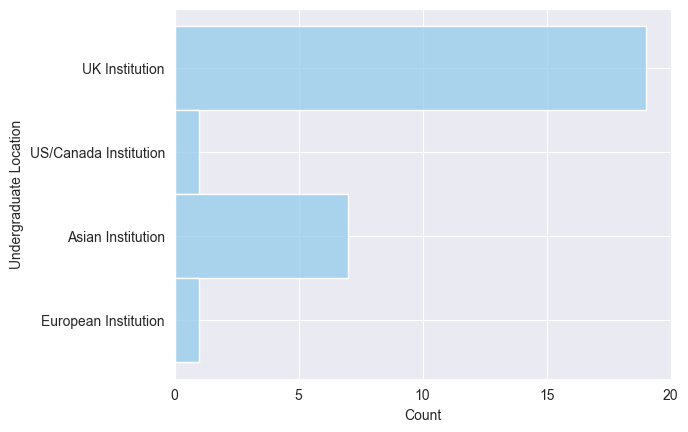

In [9]:
ug_loc_plt = sns.histplot(demographics_df, y='q6_undergrad_loc', color=blue)
ug_loc_plt.locator_params(axis='x', integer=True)
ug_loc_plt.set_xlim(0, 20)

ug_loc_plt.set(ylabel='Undergraduate Location')
ug_loc_plt.get_figure().savefig('plots/ug_loc.pdf', bbox_inches='tight')

### Programming Experience

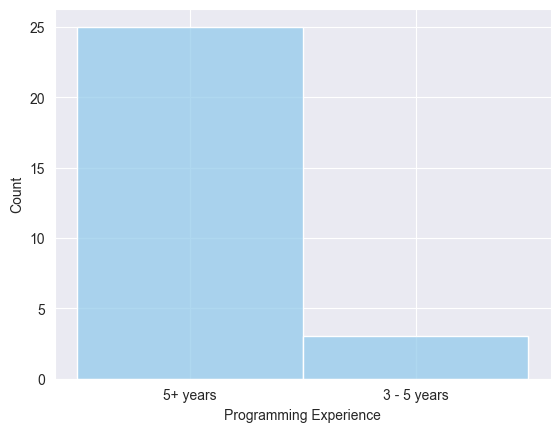

In [10]:
prog_exp = sns.histplot(demographics_df, x='q7_programming_exp', color=blue)
prog_exp.set(xlabel='Programming Experience')
prog_exp.get_figure().savefig('plots/prog_exp.pdf', bbox_inches='tight')

### Programming Languages

In [11]:
prog_langs = demographics_df['q8_programming_langs'].str.split(',').explode('q8_programming_langs')
prog_langs = prog_langs[prog_langs != 'Others']
other_langs = demographics_df['q8_programming_lang_other'].str.split(',').explode('q8_programming_lang_other').dropna()

prog_langs = pd.concat([prog_langs, other_langs]).reset_index()
prog_langs.columns = ['index', 'Programming Language']
prog_langs

,index,Programming Language
0,0,Java
1,1,C++
2,2,Python
3,4,Java
4,5,C
...,...,...
82,10,Kotlin
83,11,Swift
84,12,Scala
85,20,R


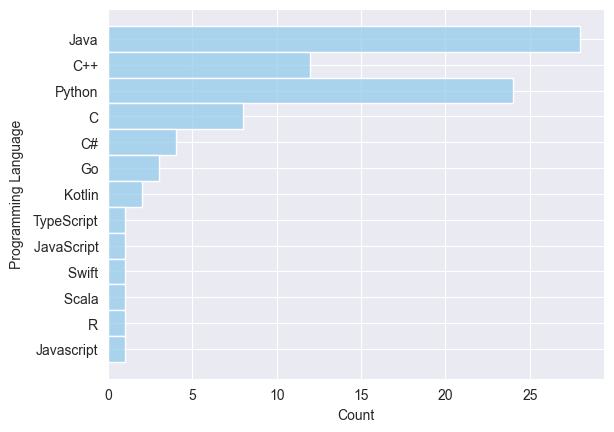

In [12]:
prog_langs_plt = sns.histplot(prog_langs, y='Programming Language', color=blue)
prog_langs_plt.get_figure().savefig('plots/prog_langs.pdf', bbox_inches='tight')

### Grading Experience

In [13]:
demographics_df['q10_grading_time'] = demographics_df['q10_grading_time'].fillna('No Experience')
demographics_df['q10_grading_time'] = pd.Categorical(demographics_df['q10_grading_time'], categories=['No Experience', '0 - 1 years', '1 - 2 years', '2 - 3 years'])
demographics_df['q11_grading_freq'] = demographics_df['q11_grading_freq'].fillna('No Experience')
demographics_df['q11_grading_freq'] = pd.Categorical(demographics_df['q11_grading_freq'], categories=['No Experience', '1 - 2 per academic year', '3 - 5 per academic year', '5+ per academic year'])
demographics_df

,participant_id,q2_gender,q2_gender_desc,q3_age,q4_ethnicity,q5_student_status,q5_student_status_other,q6_undergrad_loc,q6_undergrad_loc_desc,q7_programming_exp,q8_programming_langs,q8_programming_lang_other,q9_grading_experience,q10_grading_time,q11_grading_freq
2,4,Male,NaN,27,Other (Arab or any others),PhD Student,NaN,UK Institution,NaN,5+ years,"Java,C++,Python,Others",NaN,No,No Experience,No Experience
3,10,Male,NaN,25,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",PhD Student,NaN,US/Canada Institution,NaN,5+ years,"Java,C,Python,Others",Kotlin,Yes,2 - 3 years,3 - 5 per academic year
4,18,Male,NaN,23,White,Master's Student,NaN,UK Institution,NaN,5+ years,"Java,Python",NaN,Yes,2 - 3 years,5+ per academic year
5,19,Male,NaN,24,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",Master's Student,NaN,Asian Institution,NaN,5+ years,"Java,Python,Others","TypeScript, JavaScript",Yes,0 - 1 years,1 - 2 per academic year
6,3,Male,NaN,23,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",Master's Student,NaN,Asian Institution,NaN,5+ years,"Java,C++,C,Python",NaN,Yes,1 - 2 years,3 - 5 per academic year
7,16,Male,NaN,21,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",3rd Year Student,NaN,UK Institution,NaN,5+ years,"Java,C++,Python",NaN,No,No Experience,No Experience
8,24,Male,NaN,24,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",Master's Student,NaN,European Institution,NaN,5+ years,"Java,C++,Python",NaN,No,No Experience,No Experience
9,2,Male,NaN,22,Black/African/Caribbean,Master's Student,NaN,UK Institution,NaN,5+ years,"Java,Python",NaN,No,No Experience,No Experience
10,25,Male,NaN,24,"Asian (Indian, Pakistani, Bangladeshi, Chinese...",PhD Student,NaN,UK Institution,NaN,5+ years,"Java,C,Python",NaN,No,No Experience,No Experience
11,5,Male,NaN,21,White,3rd Year Student,NaN,UK Institution,NaN,5+ years,"Java,Python,Others","Kotlin, Swift, Scala",No,No Experience,No Experience


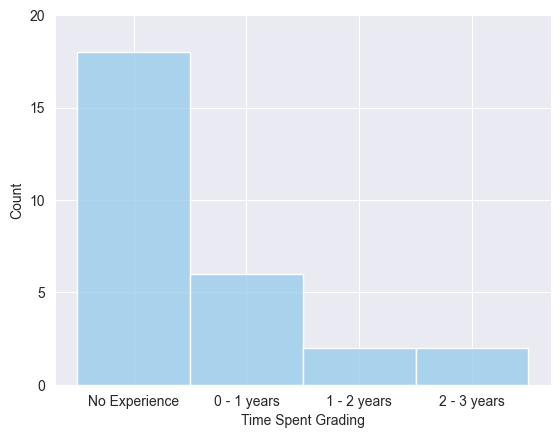

In [14]:
demographics_df = demographics_df.sort_values('q10_grading_time')
grading_time_plt = sns.histplot(demographics_df, x='q10_grading_time', color=blue)
grading_time_plt.locator_params(axis='y', integer=True)
grading_time_plt.set_ylim(0, 20)

grading_time_plt.set(xlabel='Time Spent Grading')
grading_time_plt.get_figure().savefig('plots/grading_time.pdf', bbox_inches='tight')

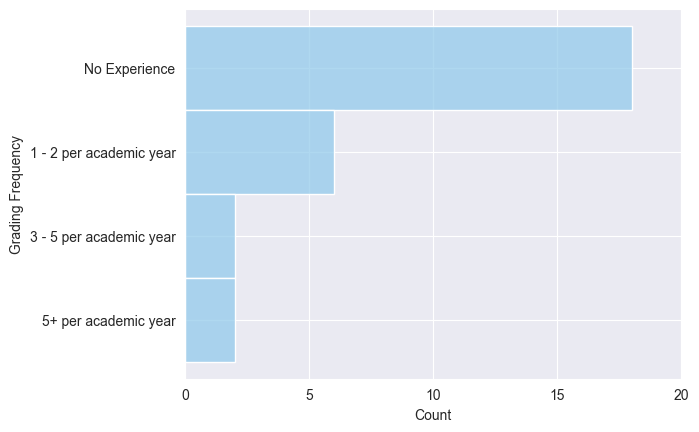

In [15]:
grading_freq_plt = sns.histplot(demographics_df, y='q11_grading_freq', color=blue)
grading_freq_plt.locator_params(axis='x', integer=True)
grading_freq_plt.set_xlim(0, 20)

grading_freq_plt.set(ylabel='Grading Frequency')
grading_freq_plt.get_figure().savefig('plots/grading_freq.pdf', bbox_inches='tight')